# Online Retail - K- Means - Hierarchical Clustering

Dataset Link : https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/data

References : https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook

In [ ]:
# Overview :
# Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 
# for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. 
# Many customers of the company are wholesalers.

# Business Goal :
# We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

In [5]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')
import datetime as dt

In [6]:
# Reading the dataset

df = pd.read_csv('OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
df.shape

# There are 5,41,909 rows and 8 columns in our dataset.

(541909, 8)

In [8]:
df.info()

# There are 5 categorical columns and 3 numerical columns in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe()

# 5-pt summary of numerical columns

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# Checking for null values

df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [12]:
df = df.dropna()

# Dropping null records from the dataset

In [13]:
df.shape

# dataset shape after dropping null values

(406829, 8)

In [ ]:
# We are going to analysis the Customers based on below 3 factors:
# R (Recency): Number of days since last purchase
# F (Frequency): Number of tracsactions
# M (Monetary): Total amount of transactions (revenue contributed)

In [15]:
# New Attribute : Monetary

df['Amount'] = df['Quantity']*df['UnitPrice']
df_m = df.groupby('CustomerID')['Amount'].sum()
df_m = df_m.reset_index()
df_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [16]:
# New Attribute : Frequency

df_f = df.groupby('CustomerID')['InvoiceNo'].count()
df_f = df_f.reset_index()
df_f.columns = ['CustomerID', 'Frequency']
df_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [17]:
# Merging the two dfs

df_1 = pd.merge(df_m, df_f, on='CustomerID', how='inner')
df_1.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [20]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [22]:
# Compute the maximum date to know the last transaction date

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [25]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df['Diff'].head()

0   373 days 04:24:00
1   373 days 04:24:00
2   373 days 04:24:00
3   373 days 04:24:00
4   373 days 04:24:00
Name: Diff, dtype: timedelta64[ns]

In [27]:
# Compute last transaction date to get the recency of customers

df_p = df.groupby('CustomerID')['Diff'].min()
df_p = df_p.reset_index()
df_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [29]:
# Extract number of days only

df_p['Diff'] = df_p['Diff'].dt.days
df_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [30]:
# Merge tha dataframes to get the final RFM dataframe

df_1 = pd.merge(df_1, df_p, on='CustomerID', how='inner')
df_1.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
df_1.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


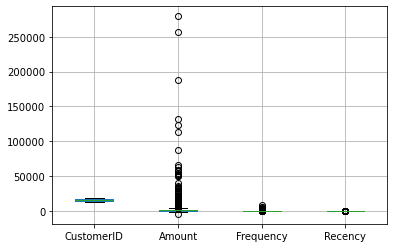

In [32]:
# Outlier Analysis

df_1.boxplot()
plt.show()

# We can see that there are outliers present in the dataset.
# We can use IQR technique to remove the outliers.

In [46]:
Q1 = df_1.quantile(0.05)
Q3 = df_1.quantile(0.95)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

df_1 = df_1[~((df_1 > UL) | (df_1 < LL)).any(axis = 1)]

# We have removed the outliers

In [60]:
# Scaling 

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_2 = df_1[['Amount', 'Frequency', 'Recency']]
df_scaled = pd.DataFrame(ss.fit_transform(df_2), columns = df_2.columns)
df_scaled.head()

,Amount,Frequency,Recency
0,-0.724074,-0.746158,2.302422
1,1.727712,1.022120,-0.905954
2,0.298304,-0.461269,-0.183079
3,0.275726,-0.048671,-0.737613
4,-0.533847,-0.598801,2.143984


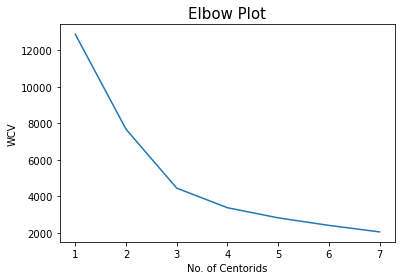

In [67]:
# Model Building - K-Means Clustering

from sklearn.cluster import KMeans

wcv = []
for i in range(1,8):
    km = KMeans(n_clusters = i)
    km.fit(df_scaled)
    wcv.append(km.inertia_)
    
plt.plot(range(1,8), wcv)
plt.xlabel('No. of Centorids')
plt.ylabel('WCV')
plt.title('Elbow Plot', fontsize = 15)
plt.show()

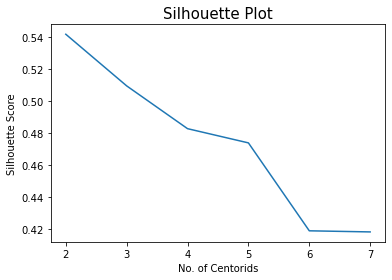

In [70]:
from sklearn.metrics import silhouette_score

silhouette_sc = []
for i in range(2,8):
    km = KMeans(n_clusters = i)
    km.fit(df_scaled)
    silhouette_sc.append(silhouette_score(df_scaled, km.labels_))

plt.plot(range(2,8), silhouette_sc)
plt.xlabel('No. of Centorids')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot', fontsize = 15)
plt.show()

In [ ]:
# k = 3 seems optimal

In [73]:
# Fitting final model with k = 3

km = KMeans(n_clusters = 3)
km.fit(df_scaled)

KMeans(n_clusters=3)

In [74]:
# Assigning labels to records

df_1['KMeans Labels'] = km.labels_

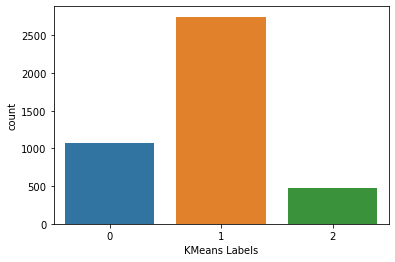

In [76]:
sns.countplot(df_1['KMeans Labels'])
plt.show()

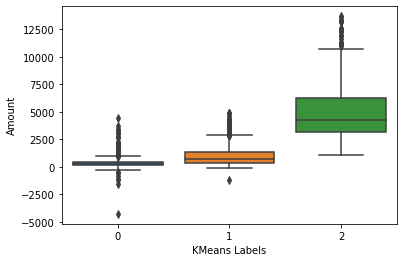

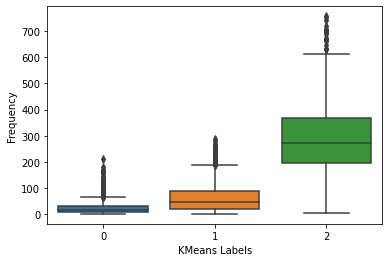

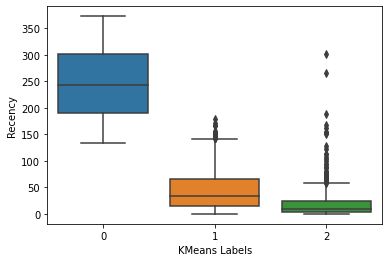

In [80]:
sns.boxplot(df_1['KMeans Labels'], df_1['Amount'])
plt.show()

sns.boxplot(df_1['KMeans Labels'], df_1['Frequency'])
plt.show()

sns.boxplot(df_1['KMeans Labels'], df_1['Recency'])
plt.show()

In [ ]:
# In all the three boxplots above, we can clearly see the 3 clusters ate significantly different.

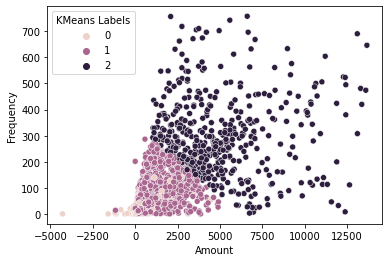

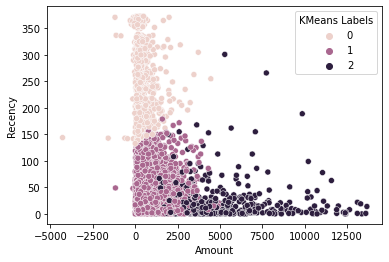

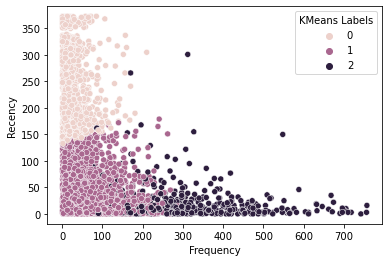

In [84]:
sns.scatterplot(df_1['Amount'], df_1['Frequency'], hue = df_1['KMeans Labels'])
plt.show()

sns.scatterplot(df_1['Amount'], df_1['Recency'], hue = df_1['KMeans Labels'])
plt.show()

sns.scatterplot(df_1['Frequency'], df_1['Recency'], hue = df_1['KMeans Labels'])
plt.show()

In [ ]:
# In the above three scatterplots, we can clearly see the 3 clusters distinctly. 

In [ ]:
# Model Building - Hierarchical Clustering

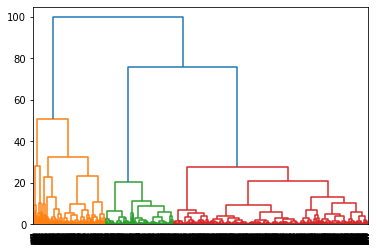

In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

link_mat = linkage(df_scaled, method = 'ward', metric = 'euclidean')
dendrogram(link_mat)
plt.show()

In [87]:
# From the above dendrogram, we can clearly see the 3 clusters distinctly.

In [91]:
# Assigning labels to records

cluster_labels = cut_tree(link_mat, n_clusters=3).reshape(-1, )
df_1['Hierarchical Labels'] = cluster_labels

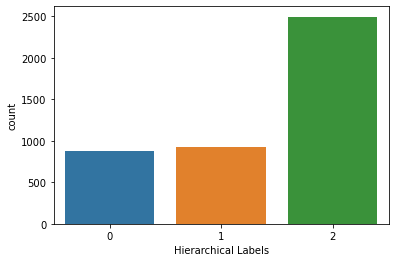

In [95]:
sns.countplot(df_1['Hierarchical Labels'])
plt.show()

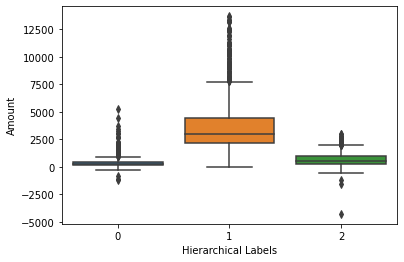

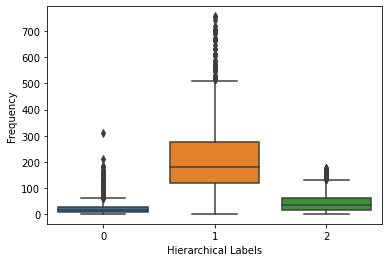

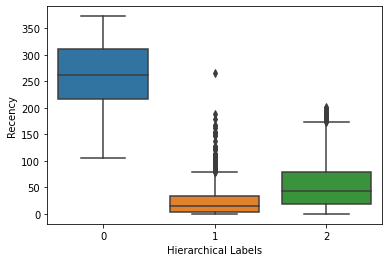

In [96]:
sns.boxplot(df_1['Hierarchical Labels'], df_1['Amount'])
plt.show()

sns.boxplot(df_1['Hierarchical Labels'], df_1['Frequency'])
plt.show()

sns.boxplot(df_1['Hierarchical Labels'], df_1['Recency'])
plt.show()

In [ ]:
# In all the three boxplots above, we can clearly see the 3 clusters ate significantly different.

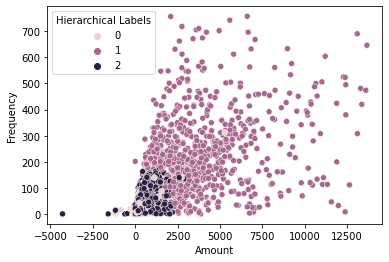

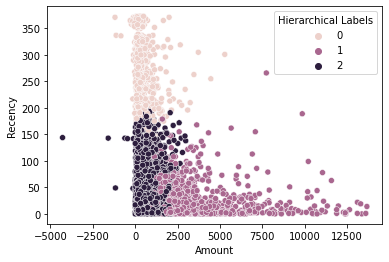

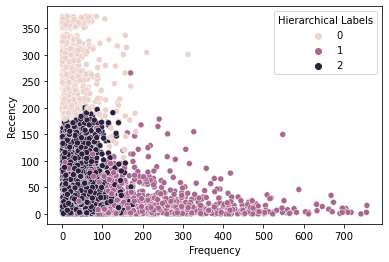

In [98]:
sns.scatterplot(df_1['Amount'], df_1['Frequency'], hue = df_1['Hierarchical Labels'])
plt.show()

sns.scatterplot(df_1['Amount'], df_1['Recency'], hue = df_1['Hierarchical Labels'])
plt.show()

sns.scatterplot(df_1['Frequency'], df_1['Recency'], hue = df_1['Hierarchical Labels'])
plt.show()

In [ ]:
# In the above three scatterplots, we can clearly see the 3 clusters distinctly. 

In [ ]:
# Inference:
    
# K-Means Clustering with 3 Cluster Labels

# Customers with Cluster Label 1 are the customers with high amount of transactions as compared to other customers.
# Customers with Cluster Label 1 are frequent buyers.
# Customers with Cluster Label 0 are recent buyers.
# Customers with Cluster Label 2 are performing poorly on all the attributes, hence are least significant from business 
# point of view.

# Hierarchical Clustering with 3 Cluster Labels

# Customers with Cluster Label 1 are the customers with high amount of transactions as compared to other customers.
# Customers with Cluster Label 1 are frequent buyers.
# Customers with Cluster Label 0 are recent buyers.
# Customers with Cluster Label 2 are performing poorly on all the attributes, hence are least significant from business 
# point of view.